# Introduction

Airbnb, as in “Air Bed and Breakfast”, is a service that lets property owners rent out their spaces to travelers looking for a place to stay. Travelers can rent a space for multiple people to share, a shared space with private rooms, or the entire property for themselves.

This project involves building a model that 
predicts the prices of an Airbnb listing in Athens. Our aim is to explore the given data concerning airbnb info, process them and build a Machine Learning model.


# Exploratory Data Analysis

First we install some necessary libraries (haversine, and plotly) for preprocessing the data based on Geospatial features and creating graphs. 

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Then, we import all necessary libraries

In [ ]:
# importing all necessary modules
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import Image
from IPython.core.display import HTML
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import re
import itertools
import string
import collections
from collections import Counter
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import haversine as hs

In [ ]:
# option to display all columns of the dataframes
pd.options.display.max_columns = None

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


Below you can take a quick look of the data.

In [ ]:
listings = pd.read_csv(
    "/content/drive/MyDrive/listings.csv", header=0, parse_dates=["host_since"]
)
print("Columns present in the data: ", [i for i in listings.columns])
print("Number of data points: ", listings.shape[0])
listings.head()

Columns present in the data:  ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availabi

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20211025162728,2021-10-26,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.98863,23.76527,Entire rental unit,Entire home/apt,8,NaN,2 baths,3.0,5.0,"[""Kitchen"", ""Free street parking"", ""Crib"", ""Pa...",$79.00,1,1125,2,8,1125,1125,2.3,1125.0,NaN,t,19,49,79,170,2021-10-26,32,7,0,2015-05-25,2019-04-04,00000957568,t,6,6,0,0,0.41
1,10990,https://www.airbnb.com/rooms/10990,20211025162728,2021-10-25,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.98903,23.76448,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Kitchen"", ""Luggage dropoff allowed"", ""Free s...",$50.00,1,1125,1,8,1125,1125,1.5,1125.0,NaN,t,26,56,86,361,2021-10-25,52,12,1,2015-11-25,2016-02-22,00001070920,t,6,6,0,0,0.72
2,10993,https://www.airbnb.com/rooms/10993,20211025162728,2021-10-25,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.98888,23.76473,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Kitchen"", ""Free street parking"", ""Patio or b...",$38.00,1,1125,1,8,1125,1125,2.2,1125.0,NaN,t,15,26,56,331,2021-10-25,71,19,3,2015-10-18,2018-03-31,00000957080,t,6,6,0,0,0.97
3,10995,https://www.airbnb.com/rooms/10995,20211025162728,2021-10-25,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi 

# How many samples and features does each file have?

In [ ]:
"The listings dataset contains {} columns and {} rows".format(
    listings.shape[1], listings.shape[0]
)

'The listings dataset contains 67 columns and 9582 rows'

**Information about the features of each listing :**

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            9582 non-null   int64         
 1   listing_url                                   9582 non-null   object        
 2   scrape_id                                     9582 non-null   int64         
 3   last_scraped                                  9582 non-null   object        
 4   name                                          9579 non-null   object        
 5   description                                   9486 non-null   object        
 6   neighborhood_overview                         6622 non-null   object        
 7   picture_url                                   9582 non-null   object        
 8   host_id                                       9582 non-null   int64 

# Checking for duplicates

Below we check for duplicates in the listings dataset, as we can see there are none.

In [ ]:
# check for duplicates and drop them based on the unique id's of each listing
listings.drop_duplicates(subset="id").reset_index(drop=True, inplace=True)
listings

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20211025162728,2021-10-26,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.988630,23.765270,Entire rental unit,Entire home/apt,8,NaN,2 baths,3.0,5.0,"[""Kitchen"", ""Free street parking"", ""Crib"", ""Pa...",$79.00,1,1125,2,8,1125,1125,2.3,1125.0,NaN,t,19,49,79,170,2021-10-26,32,7,0,2015-05-25,2019-04-04,00000957568,t,6,6,0,0,0.41
1,10990,https://www.airbnb.com/rooms/10990,20211025162728,2021-10-25,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.989030,23.764480,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Kitchen"", ""Luggage dropoff allowed"", ""Free s...",$50.00,1,1125,1,8,1125,1125,1.5,1125.0,NaN,t,26,56,86,361,2021-10-25,52,12,1,2015-11-25,2016-02-22,00001070920,t,6,6,0,0,0.72
2,10993,https://www.airbnb.com/rooms/10993,20211025162728,2021-10-25,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.988880,23.764730,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Kitchen"", ""Free street parking"", ""Patio or b...",$38.00,1,1125,1,8,1125,1125,2.2,1125.0,NaN,t,15,26,56,331,2021-10-25,71,19,3,2015-10-18,2018-03-31,00000957080,t,6,6,0,0,0.97
3,10995,https://www.airbnb.com/rooms/10995,20211025162728,2021-10-25,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampel

# Response variable : Price 
The variable contains the symbol "$" and is read as an object, therefore we remove the special characters so we can feed it to the ML models and convert to float type.

In [ ]:
listings["price"] = listings["price"].replace("[$,]", "", regex=True).astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Legend does not support Text(0.5, 1.0, 'Price range of an airbnb listing per night') instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


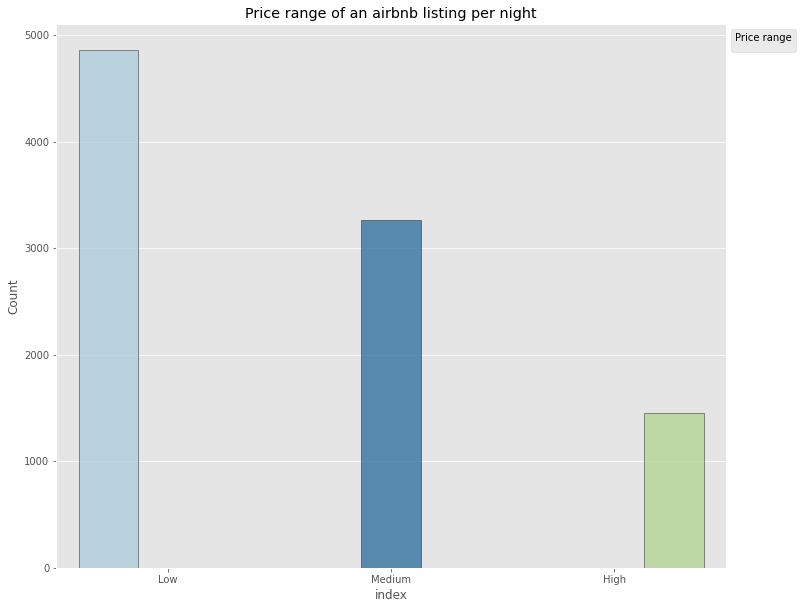

In [ ]:
def categorise_price(hotel_price):
    """
    function to categorise listings in three groups based on their price range
    """

    if hotel_price <= 50:
        return "Low"
    elif hotel_price > 50 and hotel_price <= 100:
        return "Medium"
    else:
        return "High"


range = (
    listings["price"].apply(categorise_price).value_counts().reset_index(name="Count")
)
# plot
plt.figure(figsize=(12, 10))
plt.style.use("ggplot")
p = sns.barplot(
    x="index",
    y="Count",
    data=range,
    hue="index",
    palette="Paired",
    edgecolor="black",
    alpha=0.8,
).set_title("Price range of an airbnb listing per night")
plt.legend(handles=[p], title="Price range", bbox_to_anchor=(1, 1), loc="upper left")

Below we have a table with the price range for the listings in Athens, as we can see most of them are classified as low-priced.

In [ ]:
range

,index,Count
0,Low,4862
1,Medium,3264
2,High,1456


Here we have a histogram and a distribution plot of the target variable price. The distribution graph shows that there is a right-skewed distribution on price. This means there is a positive skewness. Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis for our target variable



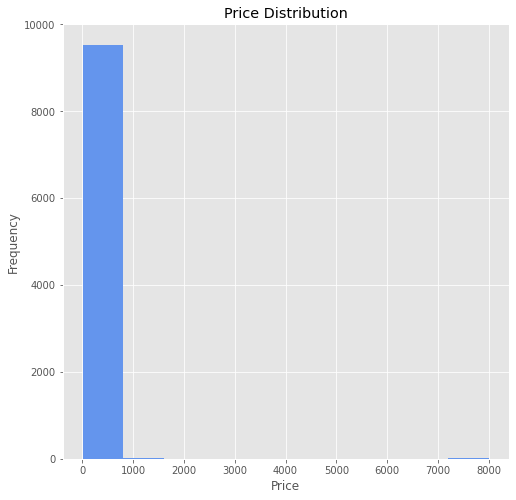

In [ ]:
plt.figure(figsize=(8, 8))
plt.style.use("ggplot")
listings["price"].plot(kind="hist", color="cornflowerblue")
plt.xlabel("Price")
plt.title("Price Distribution")
plt.ioff()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


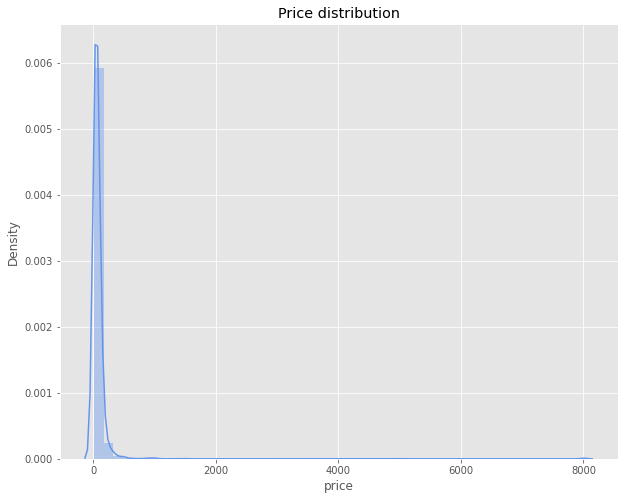

In [ ]:
plt.figure(figsize=(10, 8))
plt.style.use("ggplot")
sns.distplot(listings["price"], color="cornflowerblue")
plt.title("Price distribution")
plt.show()

# Normalise Price

In [ ]:
log_price = np.log(listings["price"])
listings["log_price"] = log_price

We see that now the distribution plot is a lot closer to  the uniform distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.248997
Kurtosis: 5.298620


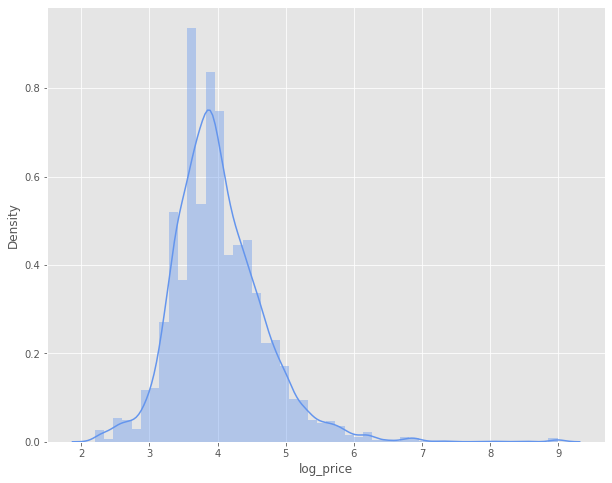

<Figure size 432x288 with 0 Axes>

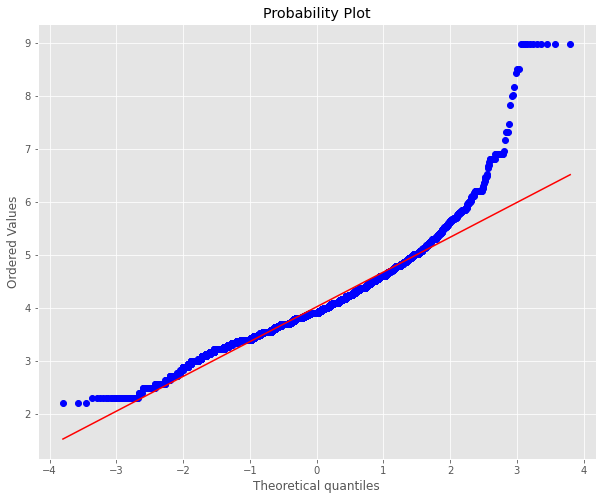

In [ ]:
plt.figure(figsize=(10, 8))
sns.distplot(listings["log_price"], color="cornflowerblue", kde=True)
fig = plt.figure()
plt.figure(figsize=(10, 8))
plt.title("Price distribution")
res = stats.probplot(listings["log_price"], plot=plt)
print("Skewness: %f" % listings["log_price"].skew())
print("Kurtosis: %f" % listings["log_price"].kurt())

# Let's explore the features available in our data in order to obtain a clearer view

In [ ]:
lat_long = listings[["latitude", "longitude"]]

In [ ]:
# Replacing columns with f/t with 0/1
listings = listings.replace({"f": 0, "t": 1})

We make a copy of the listings dataset named df in order to make changes and preprocess our data

In [ ]:
df = listings.copy()

In [ ]:
# Prinintg all unique values of the objects data types in the dataset
for column in df.columns:
    if (df[column].dtype) == "object" and column != "neighbourhood":
        print(column, "\n--------------------------")
        print(df[column].unique())
        print("\n------------------------------")

listing_url 
--------------------------
['https://www.airbnb.com/rooms/10595' 'https://www.airbnb.com/rooms/10990'
 'https://www.airbnb.com/rooms/10993' ...
 'https://www.airbnb.com/rooms/52959925'
 'https://www.airbnb.com/rooms/52960132'
 'https://www.airbnb.com/rooms/52960302']

------------------------------
last_scraped 
--------------------------
['2021-10-26' '2021-10-25']

------------------------------
name 
--------------------------
['96m2, 3BR, 2BA, Metro, WI-FI etc...'
 'Athens Quality Apartments - Deluxe Apartment'
 'Athens Quality Apartments - Studio' ...
 'Athens Spacious 4 Bedrooms 2 Bathrooms Apartment'
 'Athens Center Spacious Apartment 5th floor (33)'
 'Budget Apartment for groups at Kerameikos Metro 27']

------------------------------
description 
--------------------------
['Athens Furnished Apartment No6 is 3-bedroom apartment with 2-bathrooms<br />-excellent located <br />-close to metro station, <br />-lovely, <br />-very clean <br />with all the facilities tha

# Missing Values

# Are there any missing values? If yes, how many and how many rows  are affected

In [ ]:
# show a df with the information whether a data point is null
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
print(df.isnull().sum())

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               3
                                                ... 
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1708
log_price                                          0
Length: 68, dtype: int64


In the above plot we have a barplot with the percentage of missing values in each column to obtain a better idea about missing data

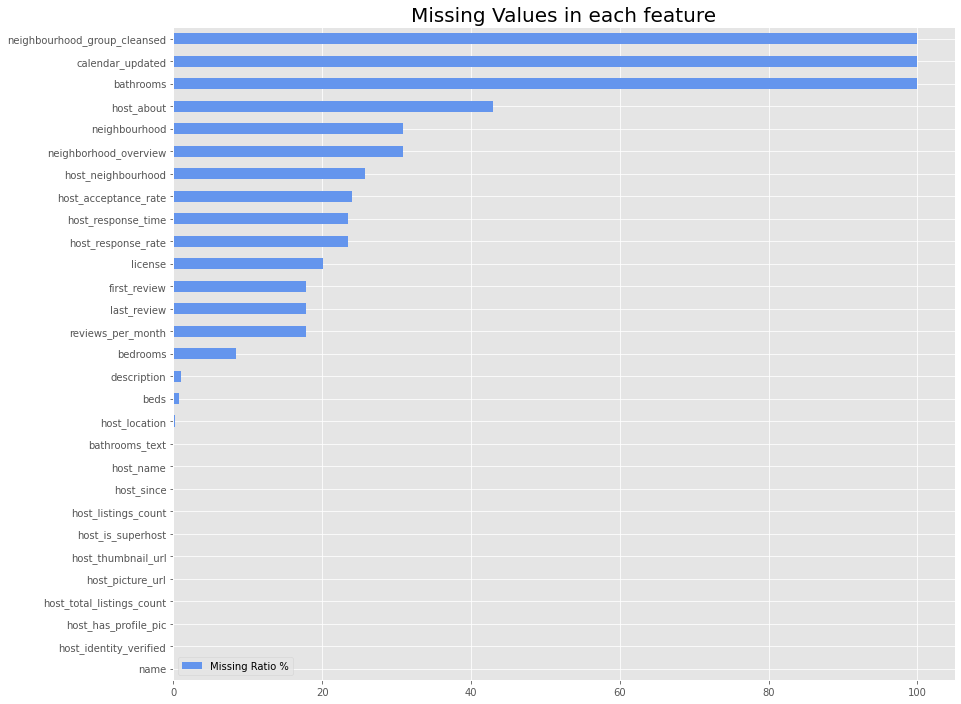

In [ ]:
plot_width, plot_height = (14, 12)
plt.rcParams["figure.figsize"] = (plot_width, plot_height)


def plot_nas(df: pd.DataFrame):
    """
    Bar plot missing values of a dataframe
    """
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=True)
        missing_data = pd.DataFrame({"Missing Ratio %": na_df})
        missing_data.plot(kind="barh", color="cornflowerblue")
        plt.title("Missing Values in each feature", fontsize=20, color="black")
        plt.show()
    else:
        print("No NAs found")


plot_nas(df)

We have many features with a great number of missing values, especially neighbourhood group cleansed,calendar updated, bathrooms & neighbourhood. We decided to later drop these features as they add no value to the data

Below we replace missing values in features "reviews per month" and "number of beds" with their median value as they only have a few missing values and they are both valuable for our model.

In [ ]:
# replace na values with median in features "beds" and "reviews_per_month"
df["reviews_per_month"] = df["reviews_per_month"].fillna(
    df["reviews_per_month"].median()
)
df["beds"] = df["beds"].fillna(df["beds"].median())

Next follows a scatterplot, since we have the latitude and longitude of each listing to see where most listings are located

Most listings seem to be at the center of Athens as expected

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


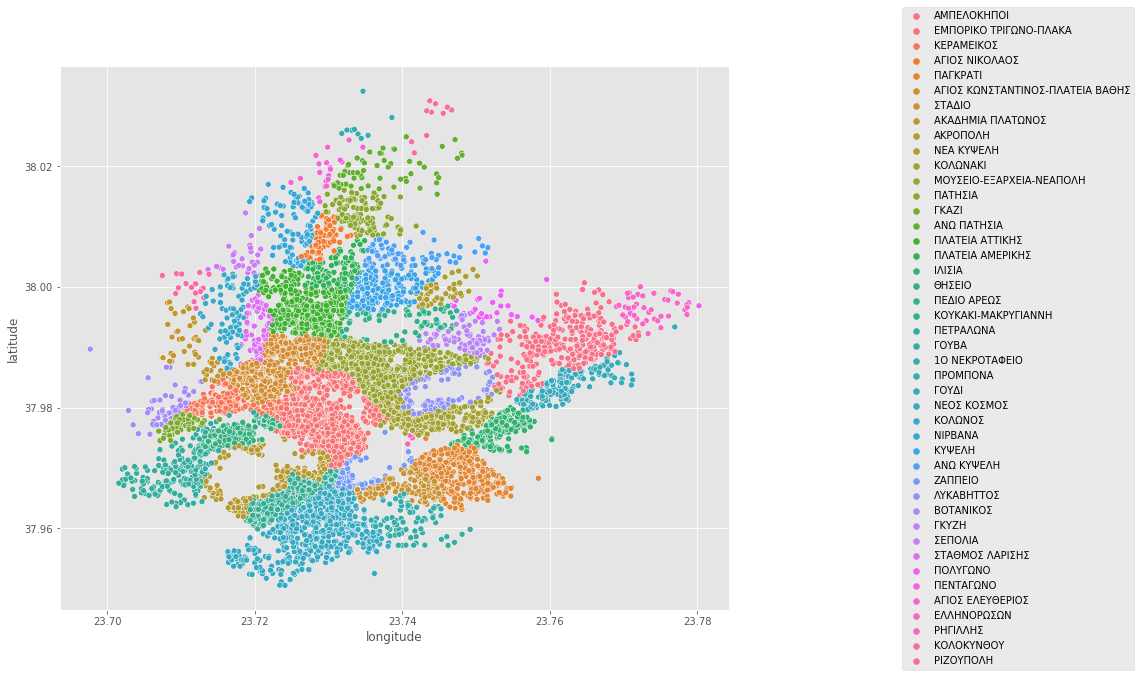

In [ ]:
plt.figure(figsize=(12, 10))
plt.style.use("ggplot")
g = sns.scatterplot(
    listings.longitude, listings.latitude, hue=listings.neighbourhood_cleansed
)
g.legend(loc="center left", bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.ioff()

The map below shows information about the price of each listing and its location. Bubbles towards darker shades indicate a more expensive listing, while with lighter shades are lower priced. The map is interactive and the user can hover and search for typical apartment prices in his area of interest

In [ ]:
# data visualization
import plotly.express as px

fig = px.scatter_mapbox(
    listings,
    lat=listings.latitude,
    lon=listings.longitude,
    color="price",
    color_continuous_scale="dense",
    zoom=11.5,
    range_color=[0, listings["price"].quantile(0.95)],  # to negate outliers
    height=700,
    title="Listings price in City of Athens",
    opacity=0.5,
    center={"lat": listings.latitude.mode()[0], "lon": listings.longitude.mode()[0]},
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "l": 0, "b": 0})
fig.show()

The bar chart below shows the types of property listings in the area of Athens. As we can observe the majority of listings are entire rental units.

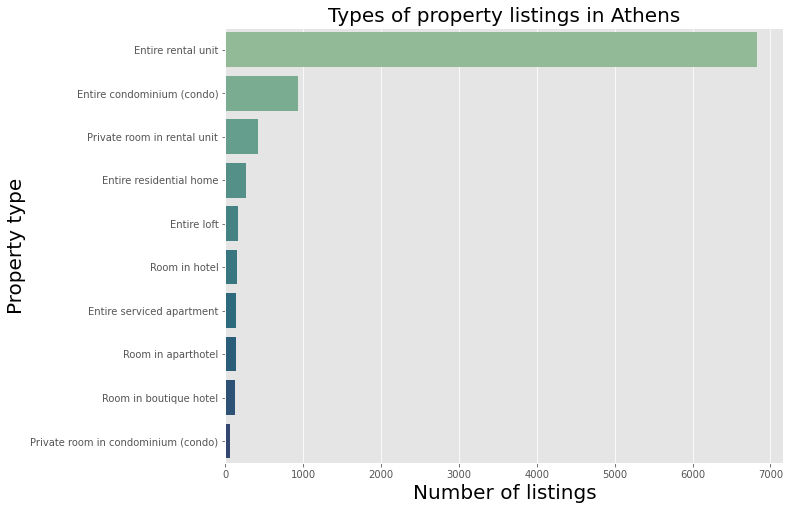

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
sns.countplot(
    y="property_type",
    data=listings,
    order=listings["property_type"].value_counts().nlargest(10).index,
    palette="crest",
)
plt.ylabel("Property type", fontsize=20, color="black")
plt.xlabel("Number of listings", fontsize=20, color="black")
plt.title("Types of property listings in Athens", fontsize=20)
plt.show()

# How many listings per room number are there?

As we observe in the bar chart about the number of listings per room number, more than 50% of listings contain one room, and a 20% of listings contains two rooms

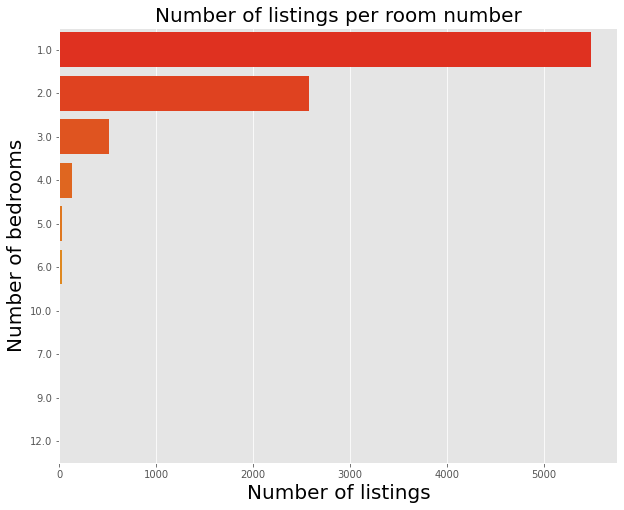

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
sns.countplot(
    y="bedrooms",
    data=listings,
    order=listings["bedrooms"].value_counts().index,
    palette="autumn",
)
plt.ylabel("Number of bedrooms", fontsize=20, color="black")
plt.xlabel("Number of listings", fontsize=20, color="black")
plt.title("Number of listings per room number", fontsize=20)
plt.show()

# How many listings per room type are there?


In the bar chart below we have the number of listings per room type in Athens. More than 80% of listings belong the entire home/apartment category. As in they are entire homes.

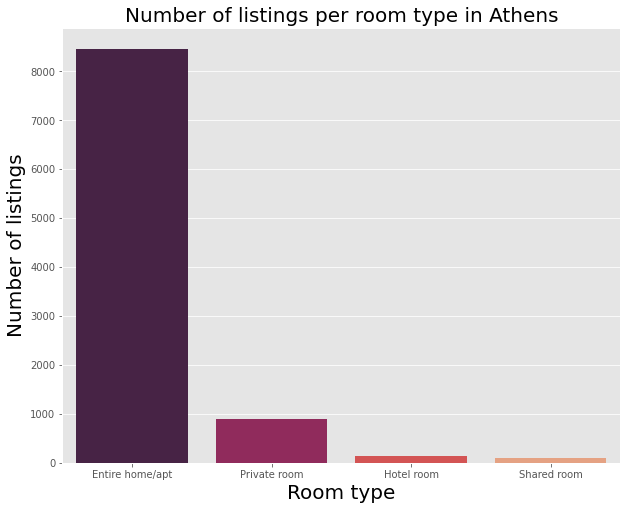

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
sns.countplot(
    x="room_type",
    data=listings,
    order=listings["room_type"].value_counts().nlargest(10).index,
    palette="rocket",
)
plt.ylabel("Number of listings", fontsize=20, color="black")
plt.xlabel("Room type", fontsize=20, color="black")
plt.title("Number of listings per room type in Athens", fontsize=20)
plt.show()

# What are the types of your features?

Most features belong to the object type and the host_since feature was converted to datetime while reading the data. In general the dataset contains both categorical and numerical features that need to be handled approprately during the preprocessing step

In [ ]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(df.dtypes)

id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                            object
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_time                                      object
host_response_rate                                     

# When was the first host registered?


**The first host registration was on 2009/09/08**

In [ ]:
# keep unique host id rows
first_reg = df.drop_duplicates(subset=["host_id"])
# convert column to string
first_reg["host_since"] = first_reg["host_since"].astype(str)
# find min
result = first_reg["host_since"].min()
print("The first host was registered on :")
print(result)

The first host was registered on :
2009-09-08


#  What year had the most hosts registered?


**The year with the most host registrations was 2018**

In [ ]:
# keep unique host id rows
most_reg = df.drop_duplicates(subset=["host_id"])
# convert column to string
most_reg["host_since"] = most_reg["host_since"].astype(str)
# extract year
most_reg["host_since"] = most_reg["host_since"].str[:4]
# group by year
most_reg = most_reg.groupby(["host_since"]).size().sort_values(ascending=False)
most_reg = most_reg.reset_index()
result = most_reg["host_since"][0]
"The year with the most host registrations was : " + str(result)

'The year with the most host registrations was : 2018'

# How many identified hosts are there? What is their percentage over all hosts?

**The number of identified hosts is 6928**

**The percentage of identified hosts over all hosts is 72.32%**

In [ ]:
result = sum(df.host_identity_verified == 1.0)
print("The number of identified hosts is :")
print(result)
result1 = (result / df.host_identity_verified.count()) * 100
print("The percentage of identified hosts over all hosts is :")
print(round(result1, 2))

The number of identified hosts is :
6928
The percentage of identified hosts over all hosts is :
72.32


# What is the distribution of price for each room type?

Most room types in Athens are fairly cheap with a few outliers displayed in the entire home/apartment category

<Figure size 864x720 with 0 Axes>

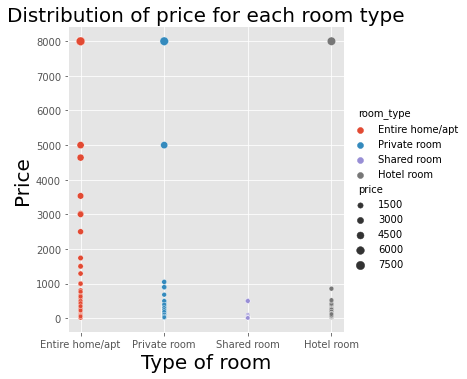

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12, 10))
sns.relplot(
    x="room_type", y="price", data=df, kind="scatter", size="price", hue="room_type"
)
plt.ylabel("Price", fontsize=20, color="black")
plt.xlabel("Type of room", fontsize=20, color="black")
plt.title("Distribution of price for each room type", fontsize=20)
plt.show()

In [ ]:
df.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

# Calculated Features

##Licence

Here we created another boolean feature based on the licence column, if a listing has a licence then it is converted to 1 else it holds the value 0

In [ ]:
# Create has license column and drop license column
temp = [1 if type(x) is str else 0 for x in df.license]

In [ ]:
# Create has license column
df["has_license"] = temp

##Host since

In [ ]:
# Convert str hos_since to timestamp
df["host_since"] = df.host_since.values.astype(np.int64) // 10**9

##Property type

The feature property type holds many different values that are all types of houses or romms therefore below we change the values of this categorical feature

In [ ]:
property_mapping = {
    "Entire rental unit": "house",
    "Entire condominium (condo)": "house",
    "Private room in rental unit": "room",
    "Entire residential home": "house",
    "loft": "house",
    "Room in hotel": "room",
    "Entire serviced apartment": "house",
    "Room in aparthotel": "room",
    "Room in boutique hotel": "room",
    "Private room in condominium (condo)": "room",
    "Private room in bed and breakfast": "room",
    "Room in serviced apartment": "room",
    "Private room in residential home": "room",
    "Shared room in hostel": "room",
    "Private room in serviced apartment": "room",
    "Shared room in rental unit": "room",
    "Entire townhouse": "house",
    "Entire guest suite": "house",
    "Entire villa": "house",
    "Shared room in residential home": "room",
    "Private room in townhouse": "room",
    "Private room in hostel": "room",
    "Room in bed and breakfast": "room",
    "Private room in guest suite": "room",
    "Entire guesthouse house": "room",
    "Tiny house": "room",
    "Shared room in condominium (condo)": "room",
    "Entire place": "house",
    "Earth house": "house",
    "Private room": "house",
    "Private room in guesthouse": "house",
    "Camper/RV": "house",
    "Shared room in serviced apartment": "house",
    "Cycladic house": "house",
    "Private room in loft": "room",
    "Floor": "house",
    "Private room in boat": "room",
    "Shared room in guesthouse": "room",
    "Private room in floor": "room",
    "Entire cottage": "house",
    "Farm stay": "house",
    "Private room in tiny house": "room",
    "Shared room in nature lodge": "room",
    "Private room in earth house": "room",
    "Shared room in bed and breakfast": "room",
    "Boat": "house",
    "Entire home/apt": "house",
    "Entire bed and breakfast": "room",
    "Private room in resort": "room",
    "Entire loft": "house",
    "Entire guesthouse": "house",
}

In [ ]:
df["property_type"].replace(property_mapping, inplace=True)
df.property_type.value_counts()

house    8413
room     1169
Name: property_type, dtype: int64

##Bathrooms

The bathrooms_text column also holds many different values. We are going to remove string character and keep only the number out of these values

In [ ]:
df["bathrooms_text"].value_counts()

1 bath              6709
1.5 baths            923
2 baths              725
1 private bath       416
1 shared bath        332
2.5 baths            118
3 baths               92
1.5 shared baths      78
2 shared baths        42
3.5 baths             29
3 shared baths        26
4 baths               21
4.5 baths              9
5 baths                9
Half-bath              8
0 baths                6
5 shared baths         5
3.5 shared baths       5
0 shared baths         4
7 baths                2
2.5 shared baths       2
4 shared baths         2
5.5 baths              2
6 baths                2
6.5 baths              2
9.5 baths              1
Shared half-bath       1
12 baths               1
Name: bathrooms_text, dtype: int64

Also, a few missing values in this feature are going to be replaced with one since this is the typical case for the majority of houses

In [ ]:
df["bathrooms_text"] = df["bathrooms_text"].fillna("1 bath")

In [ ]:
bathrooms_text = df["bathrooms_text"]
bathrooms_text = bathrooms_text.replace(
    {"Half-bath": "0.5", "Shared half-bath": "0.5"}, regex=True
)
for i, val in enumerate(bathrooms_text):
    bathrooms_text[i] = re.findall("[-+]?(?:\d*\.\d+|\d+)", val)[0]

df["bathrooms_text"] = bathrooms_text
df["bathrooms_text"] = df["bathrooms_text"].astype(float)
df.rename(columns={"bathrooms_text": "bathrooms"})

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,has_license
0,10595,https://www.airbnb.com/rooms/10595,20211025162728,2021-10-26,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,1252368000,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,NaN,NaN,NaN,1.0,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.988630,23.765270,house,Entire home/apt,8,NaN,2.0,3.0,5.0,"[""Kitchen"", ""Free street parking"", ""Crib"", ""Pa...",79.0,1,1125,2,8,1125,1125,2.3,1125.0,NaN,1,19,49,79,170,2021-10-26,32,7,0,2015-05-25,2019-04-04,00000957568,1,6,6,0,0,0.41,4.369448,1
1,10990,https://www.airbnb.com/rooms/10990,20211025162728,2021-10-25,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,1252368000,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,NaN,NaN,NaN,1.0,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.989030,23.764480,house,Entire home/apt,4,NaN,1.0,1.0,1.0,"[""Kitchen"", ""Luggage dropoff allowed"", ""Free s...",50.0,1,1125,1,8,1125,1125,1.5,1125.0,NaN,1,26,56,86,361,2021-10-25,52,12,1,2015-11-25,2016-02-22,00001070920,1,6,6,0,0,0.72,3.912023,1
2,10993,https://www.airbnb.com/rooms/10993,20211025162728,2021-10-25,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,1252368000,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,NaN,NaN,NaN,1.0,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.988880,23.764730,house,Entire home/apt,2,NaN,1.0,NaN,1.0,"[""Kitchen"", ""Free street parking"", ""Patio or b...",38.0,1,1125,1,8,1125,1125,2.2,1125.0,NaN,1,15,26,56,331,2021-10-25,71,19,3,2015-10-18,2018-03-31,00000957080,1,6,6,0,0,0.97,3.637586,1
3,10995,https://www.airbnb.com/rooms/10995,20211025162728,2021-10-25,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on t

In [ ]:
df["bathrooms"].value_counts()

Series([], Name: bathrooms, dtype: int64)

##Spatial Data

Since we are given latitude and longitude information about each listing, we are going to create two new features, each one representing the distance in km from Acropolis and Syntagma the two most visited attractions in the city of Athens

In [ ]:
# Lat, Long of monuments
Acropolis = (37.97255619074434, 23.725852581085093)
Syntagma_square = (37.975753697142274, 23.734870097114324)

# use haversine for lat,lon distances
dist_acropolis = []
dist_syntagma = []

for lat, lon in zip(df.latitude, df.longitude):
    dist_acropolis.append(hs.haversine(Acropolis, (lat, lon)))
    dist_syntagma.append(hs.haversine(Syntagma_square, (lat, lon)))

df["Dist_Acropolis"] = dist_acropolis
df["Dist_Syntagma"] = dist_syntagma

In [ ]:
l1 = df[df["Dist_Acropolis"] <= 1]["price"].mean()
l2 = df[(df["Dist_Acropolis"] > 1) & (df["Dist_Acropolis"] <= 2)]["price"].mean()
l3 = df[(df["Dist_Acropolis"] > 2) & (df["Dist_Acropolis"] <= 3)]["price"].mean()
l4 = df[(df["Dist_Acropolis"] > 3) & (df["Dist_Acropolis"] <= 4)]["price"].mean()
l5 = df[(df["Dist_Acropolis"] > 4) & (df["Dist_Acropolis"] <= 5)]["price"].mean()
l6 = df[df["Dist_Acropolis"] > 5]["price"].mean()

l1, l2, l3, l4, l5, l6

(104.37467277486911,
 82.92118789263279,
 60.63813719320327,
 60.289416846652266,
 54.968369829683695,
 156.8469387755102)

##Amenities

# What are the top-20 most common amenities provided by the hosts?


In [ ]:
# Example of amenities listed
df.amenities[:1].values

array(['["Kitchen", "Free street parking", "Crib", "Patio or balcony", "Ethernet connection", "Dishwasher", "Host greets you", "Dishes and silverware", "Long term stays allowed", "Iron", "Air conditioning", "Cooking basics", "Washer", "Refrigerator", "Laundromat nearby", "Wifi \\u2013 50 Mbps", "Coffee maker", "Microwave", "Electric stove", "Hangers", "Essentials", "High chair", "Hair dryer", "43\\" HDTV", "Extra pillows and blankets", "Shower gel", "Dedicated workspace", "Oven", "Single level home", "Bed linens", "Hot water", "Central heating", "Shampoo"]'],
      dtype=object)

**Below follow the most common amenities in listings**

In [ ]:
amenities_list = list(df["amenities"].apply(lambda x: x.split()))
amenities_list = [x for y in amenities_list for x in y]
most_common_20 = Counter(amenities_list).most_common(20)
most_common_20

[('and', 11905),
 ('allowed",', 11370),
 ('"Hot', 9492),
 ('"Essentials",', 9077),
 ('conditioning",', 8936),
 ('dryer",', 8731),
 ('term', 8696),
 ('stays', 8696),
 ('"Wifi",', 8682),
 ('"Air', 8670),
 ('"Long', 8666),
 ('"Hangers",', 8580),
 ('"Hair', 8297),
 ('"Iron",', 8246),
 ('["Kitchen",', 7920),
 ('"Heating",', 7571),
 ('water",', 6991),
 ('"Dishes', 6794),
 ('silverware",', 6794),
 ('"TV",', 6785)]

In [ ]:
import collections
from collections import Counter

values = " ".join(df["amenities"])
top_words = Counter(values.split()).most_common()
top_words

[('and', 11905),
 ('allowed",', 11370),
 ('"Hot', 9492),
 ('"Essentials",', 9077),
 ('conditioning",', 8936),
 ('dryer",', 8731),
 ('term', 8696),
 ('stays', 8696),
 ('"Wifi",', 8682),
 ('"Air', 8670),
 ('"Long', 8666),
 ('"Hangers",', 8580),
 ('"Hair', 8297),
 ('"Iron",', 8246),
 ('["Kitchen",', 7920),
 ('"Heating",', 7571),
 ('water",', 6991),
 ('"Dishes', 6794),
 ('silverware",', 6794),
 ('"TV",', 6785),
 ('"Dedicated', 6768),
 ('"Cooking', 6729),
 ('basics",', 6703),
 ('"Refrigerator",', 6424),
 ('maker",', 6352),
 ('"Coffee', 6291),
 ('workspace",', 6277),
 ('"Shampoo"]', 6233),
 ('"Free', 6003),
 ('"Bed', 5894),
 ('linens",', 5887),
 ('alarm",', 5599),
 ('"Elevator",', 5322),
 ('"Fire', 5223),
 ('extinguisher",', 5213),
 ('"First', 5022),
 ('aid', 5022),
 ('kit",', 5009),
 ('or', 4980),
 ('"Stove",', 4954),
 ('balcony",', 4838),
 ('street', 4629),
 ('parking",', 4549),
 ('"Oven",', 4547),
 ('"Washer",', 3939),
 ('"Extra', 3917),
 ('pillows', 3917),
 ('blankets",', 3917),
 ('"Pati

The wordcloud above depicts the most provided amenities in the listings of Athens. As we see amenities such as Dryer, Hot water, Elevator, Internet are the most typical

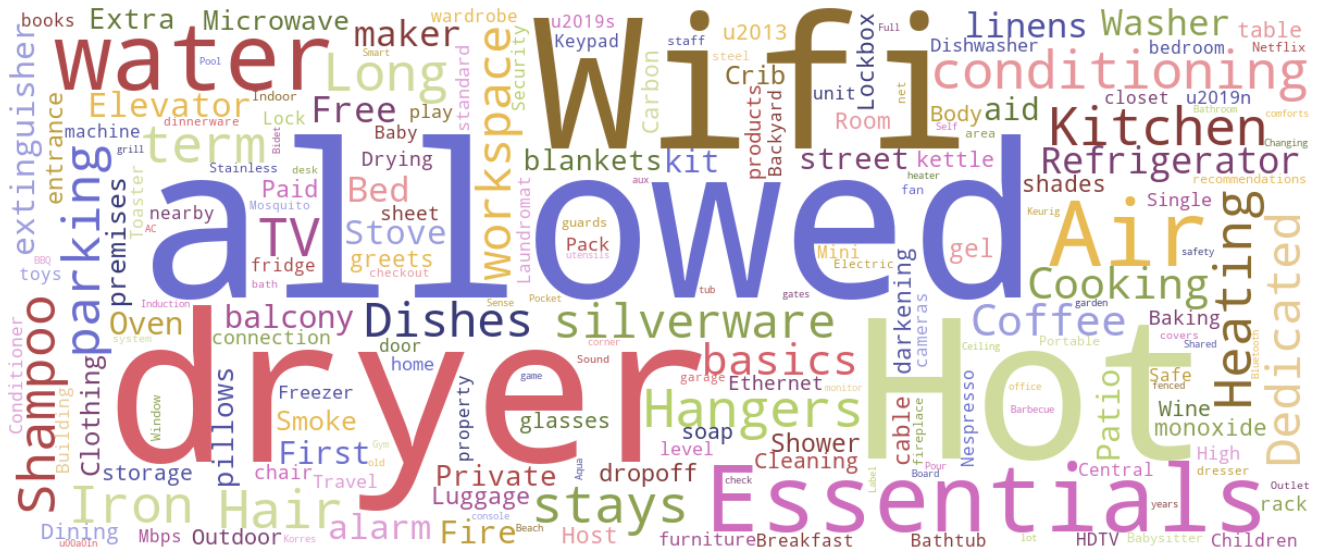

In [ ]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS

# Plotting the most common words with WordCloud.
wc = WordCloud(
    width=1200,
    height=500,
    collocations=False,
    background_color="white",
    colormap="tab20b",
).generate(" ".join(amenities_list))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25, 10))
# generate word cloud, interpolation
plt.imshow(wc, interpolation="bilinear")
_ = plt.axis("off")

# Feature selection

At this part of the project we decided to drop some of the listings features' since they are irrelevant or won't add any value to our models. These are features like urls, irrelevant dates, features with only null values, information about the host,id's

In [ ]:
### the following code drops the unnecessary columns (mostly the non-numeric columns)
to_drop = [
    "host_response_rate",
    "id",
    "picture_url",
    "listing_url",
    "scrape_id",
    "last_scraped",
    "name",
    "description",
    "neighborhood_overview",
    "host_id",
    "calendar_last_scraped",
    "host_url",
    "host_name",
    "host_thumbnail_url",
    "host_picture_url",
    "host_since",
    "host_location",
    "host_neighbourhood",
    "host_about",
    "host_response_time",
    "host_listings_count",
    "host_total_listings_count",
    "host_verifications",
    "neighbourhood",
    "longitude",
    "latitude",
    "calendar_last_scraped",
    "host_acceptance_rate",
    "license",
    "amenities",
    "first_review",
    "neighbourhood_group_cleansed",
    "last_review",
    "calculated_host_listings_count",
    "calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms",
    "calculated_host_listings_count_shared_rooms",
    "calendar_updated",
    "minimum_minimum_nights",
    "maximum_maximum_nights",
    "bathrooms",
    "number_of_reviews_ltm",
    "number_of_reviews_l30d",
    "bedrooms",
]
df = df.drop(columns=to_drop)
df.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,reviews_per_month,log_price,has_license,Dist_Acropolis,Dist_Syntagma
0,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,house,Entire home/apt,8,2.0,5.0,79.0,1,1125,8,1125,2.3,1125.0,1,19,49,79,170,32,1,0.41,4.369448,1,3.889739,3.024714
1,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,house,Entire home/apt,4,1.0,1.0,50.0,1,1125,8,1125,1.5,1125.0,1,26,56,86,361,52,1,0.72,3.912023,1,3.849331,2.985638
2,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,house,Entire home/apt,2,1.0,1.0,38.0,1,1125,8,1125,2.2,1125.0,1,15,26,56,331,71,1,0.97,3.637586,1,3.860750,2.996546
3,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,house,Entire home/apt,4,1.0,2.0,48.0,1,1125,8,1125,1.5,1125.0,1,22,52,82,357,24,1,0.33,3.871201,1,3.849331,2.985638
4,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,house,Entire home/apt,4,1.0,1.0,47.0,1,1125,8,1125,1.8,1125.0,1,0,27,57,208,17,1,0.23,3.850148,1,3.900524,3.036796


In [ ]:
df.columns.tolist()

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms_text',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'instant_bookable',
 'reviews_per_month',
 'log_price',
 'has_license',
 'Dist_Acropolis',
 'Dist_Syntagma']

# Correlation

The correlation matrix does not show any strong relationship between price and any of the explanatory variables, hence we will not be droping any fratures because of correlation

Text(0.5, 1.0, 'Correlation Matrix')

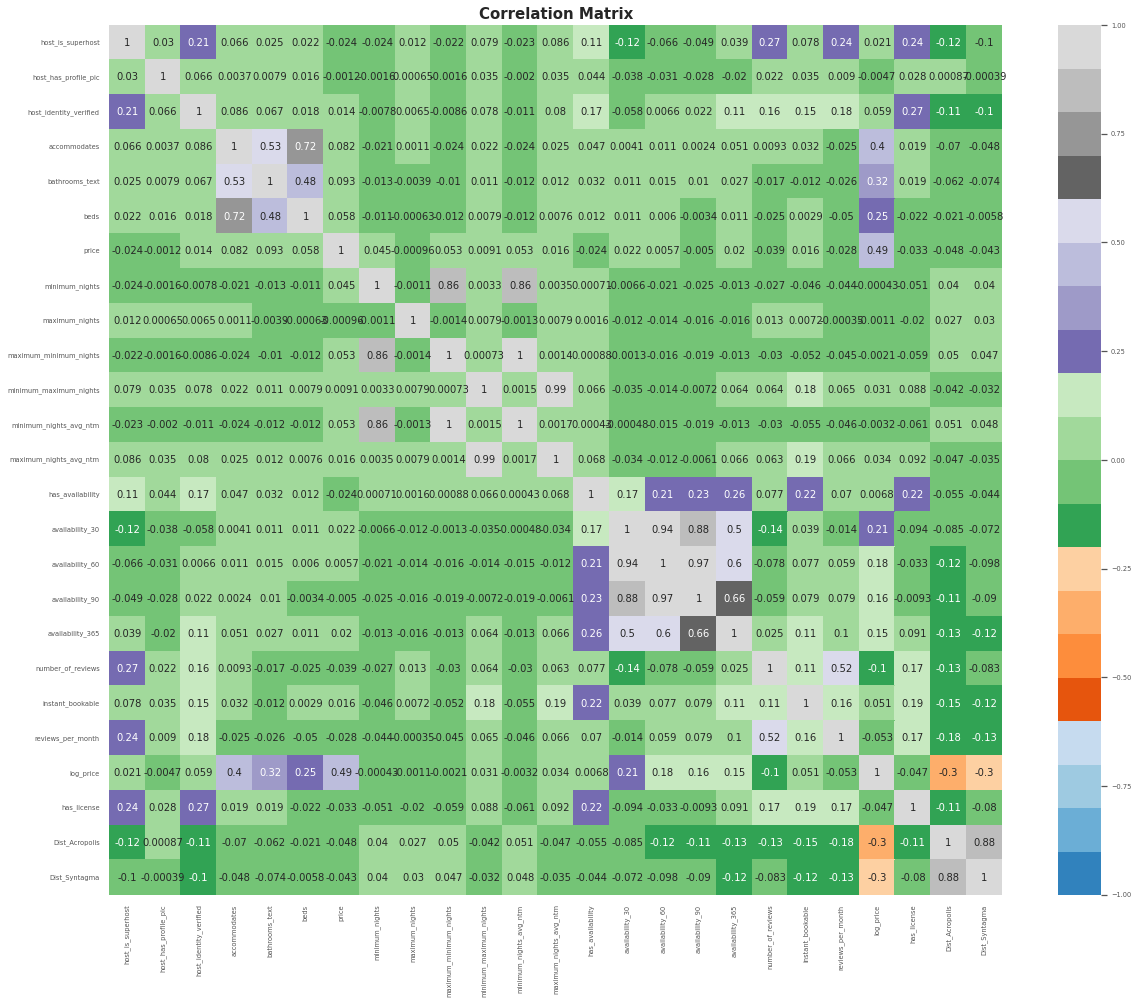

In [ ]:
sns.set(font_scale=0.6)
plt.style.use("ggplot")
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), cmap="tab20c", annot=True, vmin=-1, vmax=1)
plt.title("Correlation Matrix", size=15, weight="bold")

In [ ]:
import plotly.figure_factory as ff

corrs = df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True,
)
figure.show()

In [ ]:
df.corr()

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,reviews_per_month,log_price,has_license,Dist_Acropolis,Dist_Syntagma
host_is_superhost,1.000000,0.030302,0.210220,0.065834,0.025178,0.022383,-0.024253,-0.023834,0.012413,-0.022049,0.079222,-0.022814,0.085809,0.113075,-0.123414,-0.066313,-0.049018,0.038826,0.267277,0.078073,0.244545,0.021151,0.240111,-0.121016,-0.099576
host_has_profile_pic,0.030302,1.000000,0.065554,0.003695,0.007902,0.015811,-0.001176,-0.001595,0.000650,-0.001601,0.034606,-0.001999,0.035450,0.043936,-0.038129,-0.031136,-0.028450,-0.019651,0.022210,0.034584,0.008957,-0.004715,0.027901,0.000874,-0.000385
host_identity_verified,0.210220,0.065554,1.000000,0.085976,0.066786,0.017746,0.014352,-0.007814,0.006465,-0.008620,0.077641,-0.011426,0.079594,0.169921,-0.058370,0.006590,0.021513,0.113324,0.159857,0.151050,0.183539,0.059461,0.270397,-0.114885,-0.104181
accommodates,0.065834,0.003695,0.085976,1.000000,0.525013,0.723093,0.081760,-0.020590,0.001090,-0.023548,0.022457,-0.023946,0.024569,0.047436,0.004060,0.011264,0.002376,0.051170,0.009286,0.032025,-0.025325,0.400410,0.018836,-0.070442,-0.047690
bathrooms_text,0.025178,0.007902,0.066786,0.525013,1.000000,0.481221,0.092630,-0.012980,-0.003943,-0.010034,0.011375,-0.011817,0.012019,0.032371,0.011430,0.015222,0.010377,0.027285,-0.016976,-0.012217,-0.026037,0.324928,0.018772,-0.061521,-0.073877
beds,0.022383,0.015811,0.017746,0.723093,0.481221,1.000000,0.058360,-0.011159,-0.000632,-0.012381,0.007882,-0.012399,0.007572,0.011636,0.010757,0.005988,-0.003416,0.010550,-0.025346,0.002929,-0.049506,0.253194,-0.021696,-0.021222,-0.005825
price,-0.024253,-0.001176,0.014352,0.081760,0.092630,0.058360,1.000000,0.045310,-0.000962,0.052578,0.009089,0.052718,0.016360,-0.023862,0.022222,0.005663,-0.005002,0.020029,-0.038618,0.015681,-0.028242,0.486660,-0.032534,-0.047722,-0.043044
minimum_nights,-0.023834,-0.001595,-0.007814,-0.020590,-0.012980,-0.011159,0.045310,1.000000,-0.001123,0.855729,0.003276,0.858392,0.003470,0.000710,-0.006612,-0.021050,-0.024847,-0.012907,-0.027493,-0.045617,-0.043819,-0.000431,-0.050822,0.039893,0.040408
maximum_nights,0.012413,0.000650,0.006465,0.001090,-0.003943,-0.000632,-0.000962,-0.001123,1.000000,-0.001374,0.007936,-0.001305,0.007915,0.001553,-0.011827,-0.014427,-0.016064,-0.015647,0.013024,0.007188,-0.000346,-0.001087,-0.020440,0.026918,0.029953
maximum_minimum_nights,-0.022049,-0.001601,-0.008620,-0.023548,-0.010034,-0.012381,0.052578,0.855729,-0.001374,1.000000,0.000734,0.998163,0.001361,0.000883,-0.001263,-0.015833,-0.019288,-0.013319,-0.029653,-0.052333,-0.044885,-0.002121,-0.059449,0.050350,0.046725


In [ ]:
# This method gives us some descriptive statistics
# It should be noted that categorical variables don't have some types
# of numerical descriptives,which are displayes as Nan below
# and numerical variables don't have some types of categorical descriptives

df.describe(include="all")

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,reviews_per_month,log_price,has_license,Dist_Acropolis,Dist_Syntagma
count,9579.000000,9579.000000,9579.000000,9582,9582,9582,9582.000000,9582.000000,9582.000000,9582.000000,9582.000000,9.582000e+03,9582.000000,9582.000000,9582.000000,9582.000000,9582.000000,9582.000000,9582.000000,9582.000000,9582.000000,9582.000000,9582.000000,9582.000000,9582.000000,9582.000000,9582.000000,9582.000000
unique,NaN,NaN,NaN,44,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,house,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1866,8413,8463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.397954,0.996868,0.723249,NaN,NaN,NaN,3.829159,1.205803,2.103110,83.438113,3.265811,1.789778e+03,3.342413,925.747652,3.222156,929.314788,0.979023,13.146838,32.592778,53.227719,230.261010,42.434460,0.686078,1.743152,4.020558,0.799416,1.741255,1.655357
std,0.489501,0.055878,0.447416,NaN,NaN,NaN,1.959972,0.514446,1.547566,299.558115,19.924228,1.021515e+05,17.172126,404.232711,17.122523,400.252376,0.143314,11.297222,22.991399,33.765424,130.262062,69.982756,0.464109,1.874774,0.677802,0.400459,1.120962,0.940515
min,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,9.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,2.197225,0.000000,0.041904,0.037787
25%,0.000000,1.000000,0.000000,NaN,NaN,NaN,2.000000,1.000000,1.000000,36.000000,1.000000,9.000000e+01,1.000000,1125.000000,1.000000,1125.000000,1.000000,0.000000,1.250000,22.000000,117.000000,2.000000,0.000000,0.580000,3.583519,1.000000,0.812140,1.009822
50%,0.000000,1.000000,1.000000,NaN,NaN,NaN,4.000000,1.000000,2.000000,50.000000,2.000000,1.125000e+03,2.000000,1125.000000,2.000000,1125.000000,1.000000,13.000000,40.000000,66.000000,283.000000,12.000000,1.000000,1.200000,3.912023,1.000000,1.495348,1.503724
75%,1.000000,1.000000,1.000000,NaN,NaN,NaN,4.000000,1.000000,3.000000,80.000000,2.000000,1.125000e+03,2.000000,1125.000000,2.000000,1125.000000,1.000000,24.000000,54.000000,83.000000,350.000000,52.000000,1.000000,2.220000,4.382027,1.000000,2.280064,2.115261


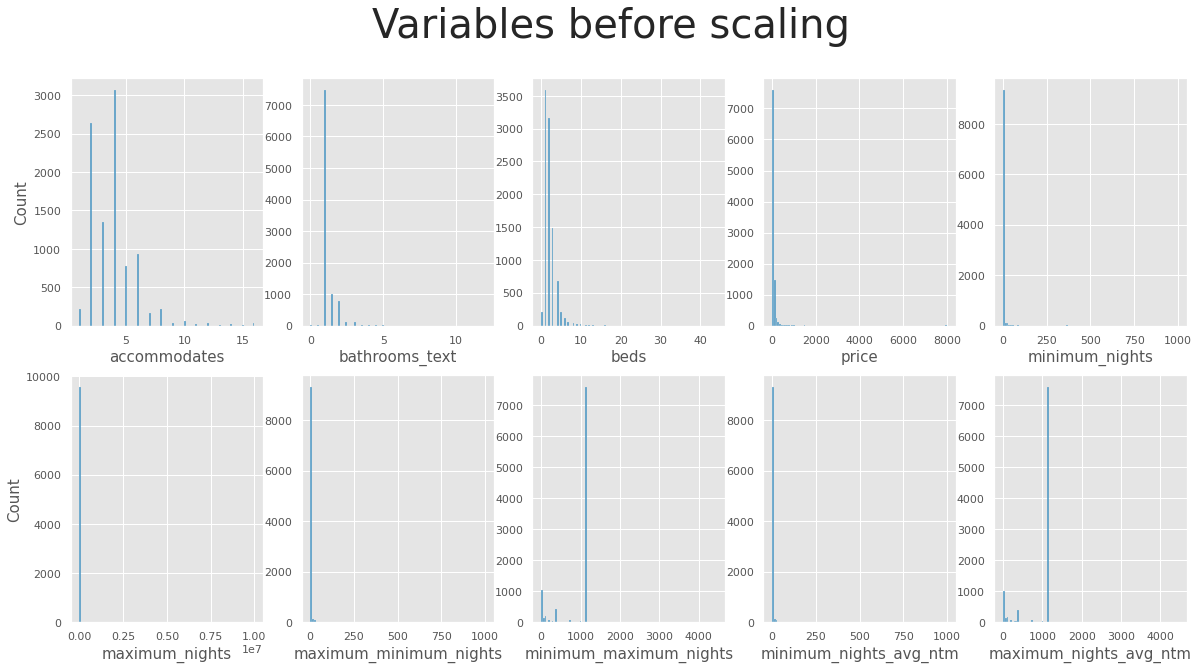

In [ ]:
# fix styling
sns.set_context(
    "notebook", rc={"font.size": 8, "axes.titlesize": 30, "axes.labelsize": 15}
)

# Create columns iterator
numerical = df.loc[
    :,
    ~df.columns.isin(
        (
            "host_is_superhost",
            "host_has_profile_pic",
            "host_identity_verified",
            "neighbourhood_cleansed",
            "property_type",
            "room_type",
            "has_availability",
            "number_of_reviews",
            "instant_bookable",
            "has_license",
        )
    ),
].columns
lst = iter(numerical)


# Create histograms
fig, axes = plt.subplots(2, 5, figsize=(20, 10))


for triaxis in axes:
    for i, axis in enumerate(triaxis):
        try:
            b = sns.histplot(data=df, x=df[next(lst)], bins=100, ax=axis)
            if i != 0:
                b.set_ylabel(None)
        except IndexError:
            break

fig.suptitle("Variables before scaling", fontsize=40)

_ = sns.reset_orig

# How many listings per neighborhood are there?


As we can observe most listings are in the neighborhood of Plaka, Koukaki, Neos Kosmos and Exarxeia

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text major ticklabel objects>)

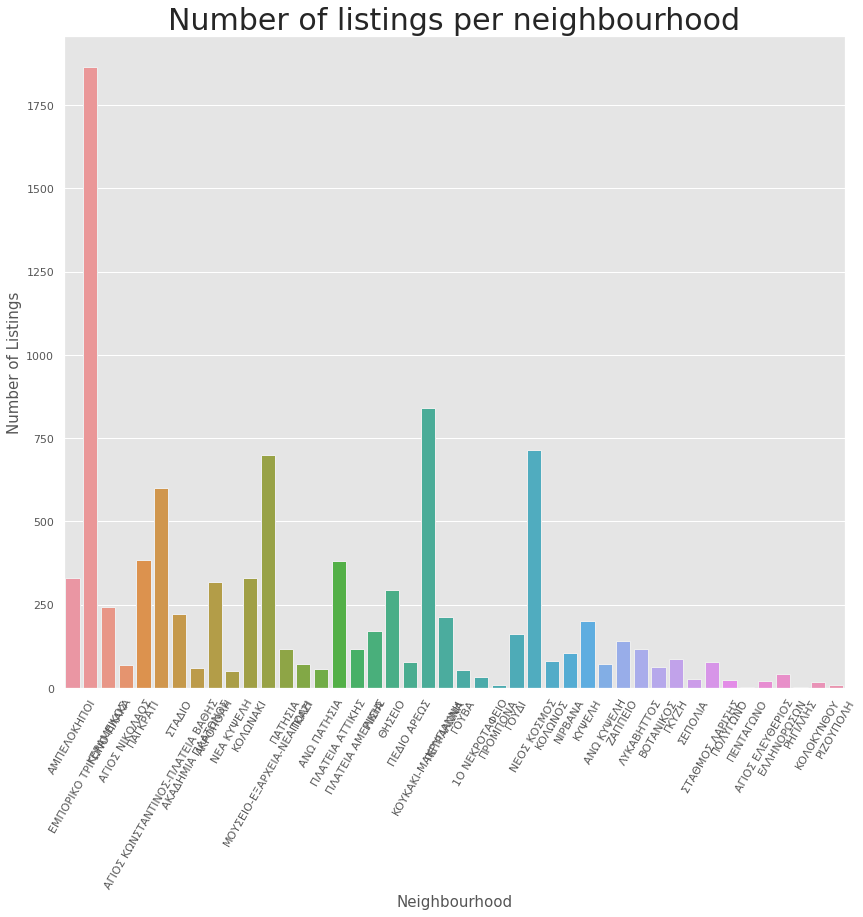

In [ ]:
# Plot countplot
ax = sns.countplot(x="neighbourhood_cleansed", data=df)

# Set title
plt.title("Number of listings per neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Listings")
plt.xticks(rotation=60)

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 <a list of 9 Text major ticklabel objects>)

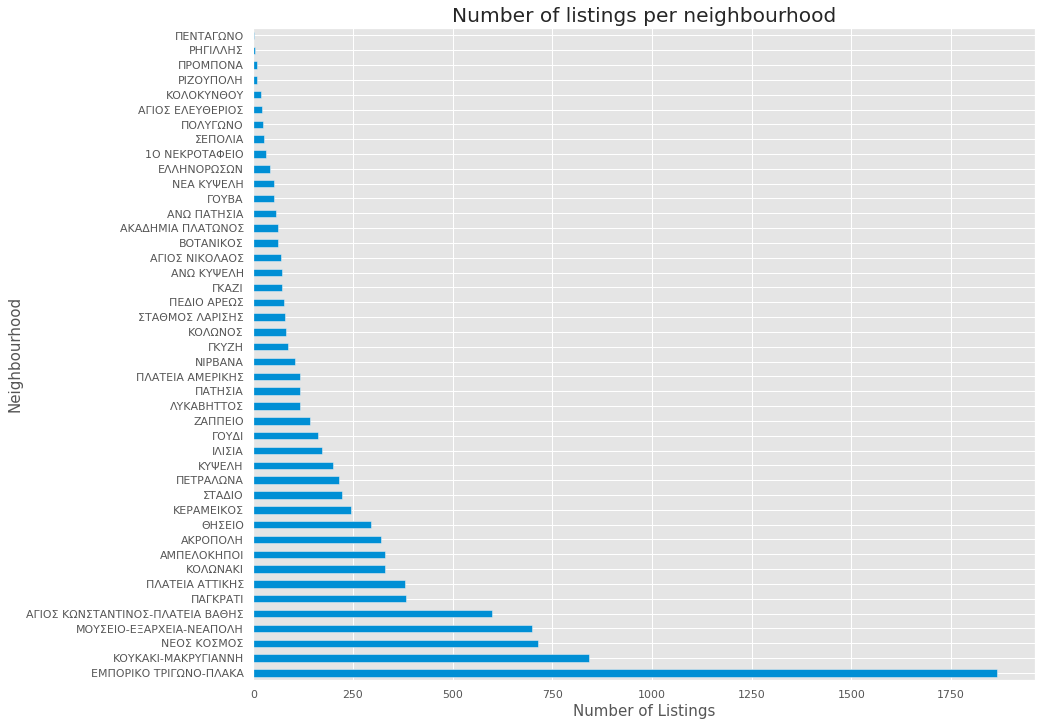

In [ ]:
fig, ax = plt.subplots()
plt.style.use("fivethirtyeight")
df["neighbourhood_cleansed"].value_counts().plot(kind="barh")
plt.title("Number of listings per neighbourhood")
plt.ylabel("Neighbourhood")
plt.xlabel("Number of Listings")
plt.xticks(rotation=0)

**The number of beds in a tyoical listing in Athens is between one or two per listing**

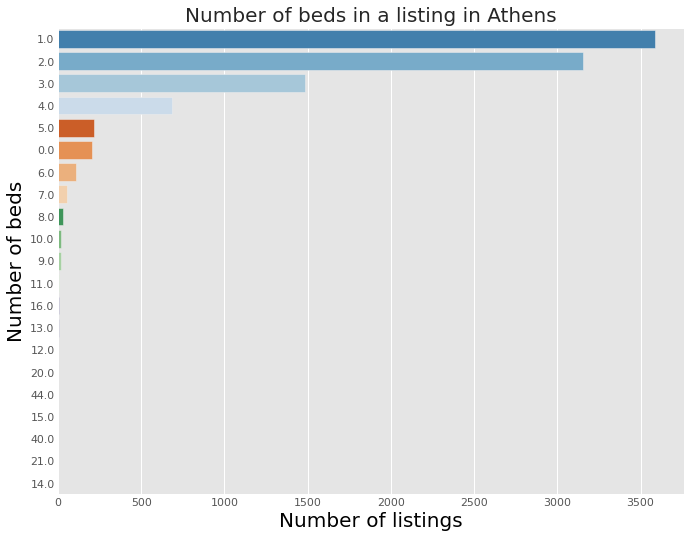

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
sns.countplot(
    y="beds", data=df, order=df["beds"].value_counts().index, palette="tab20c"
)
plt.ylabel("Number of beds", fontsize=20, color="black")
plt.xlabel("Number of listings", fontsize=20, color="black")
plt.title("Number of beds in a listing in Athens", fontsize=20)
plt.show()

# What is the distribution of listings per host? What are the most listings that a single host has?


**A typical host in Athens has 18 listings, while the most listings from a single host are 2095!**

In [ ]:
print("Median number of listings per host:", int(listings.host_listings_count.median()))
print(
    "Mean number of listings per host:", int(round(listings.host_listings_count.mean()))
)
print(
    "Max number of listings per host:", int(round(listings.host_listings_count.max()))
)
print(
    f"{int(round(100*len(listings[listings.host_listings_count == 1])/len(listings)))}% of listings are from hosts with one listing."
)

Median number of listings per host: 3
Mean number of listings per host: 18
Max number of listings per host: 2095
26% of listings are from hosts with one listing.


# Histogram of the numeric features

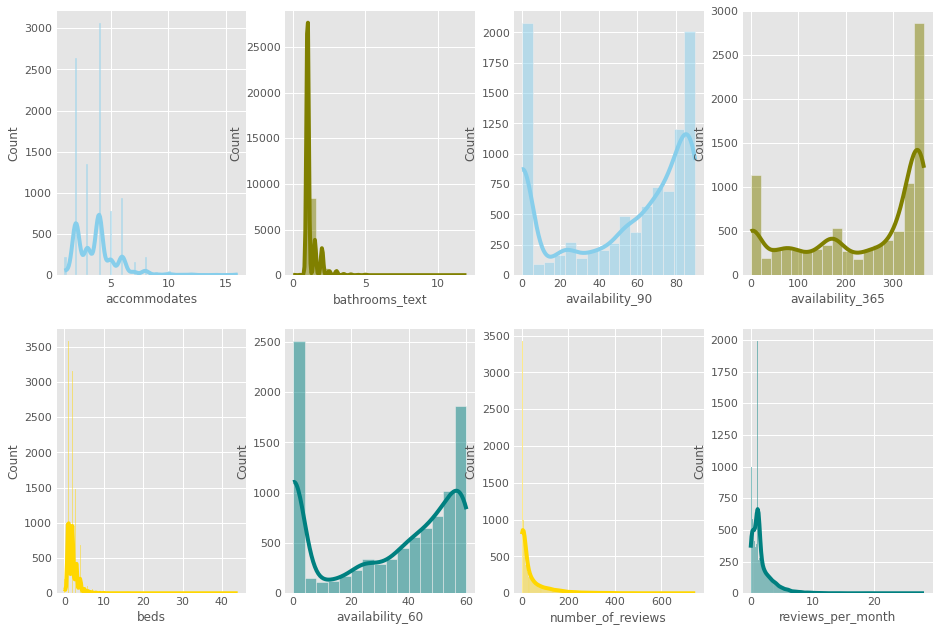

In [ ]:
plt.style.use("ggplot")
fig, axs = plt.subplots(2, 4, figsize=(14, 10))

sns.histplot(data=df, x="accommodates", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="bathrooms_text", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="availability_90", kde=True, color="skyblue", ax=axs[0, 2])
sns.histplot(data=df, x="availability_365", kde=True, color="olive", ax=axs[0, 3])
sns.histplot(data=df, x="beds", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="availability_60", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="number_of_reviews", kde=True, color="gold", ax=axs[1, 2])
sns.histplot(data=df, x="reviews_per_month", kde=True, color="teal", ax=axs[1, 3])
plt.show()

In [ ]:
# Reset index after dropping the last null values in our data
df = df.dropna().reset_index(drop=True)
df

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,reviews_per_month,log_price,has_license,Dist_Acropolis,Dist_Syntagma
0,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,house,Entire home/apt,8,2.0,5.0,79.0,1,1125,8,1125,2.3,1125.0,1,19,49,79,170,32,1,0.41,4.369448,1,3.889739,3.024714
1,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,house,Entire home/apt,4,1.0,1.0,50.0,1,1125,8,1125,1.5,1125.0,1,26,56,86,361,52,1,0.72,3.912023,1,3.849331,2.985638
2,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,house,Entire home/apt,2,1.0,1.0,38.0,1,1125,8,1125,2.2,1125.0,1,15,26,56,331,71,1,0.97,3.637586,1,3.860750,2.996546
3,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,house,Entire home/apt,4,1.0,2.0,48.0,1,1125,8,1125,1.5,1125.0,1,22,52,82,357,24,1,0.33,3.871201,1,3.849331,2.985638
4,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,house,Entire home/apt,4,1.0,1.0,47.0,1,1125,8,1125,1.8,1125.0,1,0,27,57,208,17,1,0.23,3.850148,1,3.900524,3.036796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9574,1.0,1.0,1.0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,house,Entire home/apt,2,1.0,1.0,10.0,1,1125,1,1125,1.0,1125.0,1,21,51,81,341,0,1,1.20,2.302585,1,0.542200,0.580185
9575,0.0,1.0,1.0,ΝΕΟΣ ΚΟΣΜΟΣ,room,Private room,3,1.0,3.0,31.0,1,365,1,365,1.0,365.0,1,30,60,90,365,0,1,1.20,3.433987,1,1.899272,2.222390
9576,0.0,1.0,1.0,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,house,Entire home/apt,13,2.0,9.0,65.0,1,365,1,1125,1.0,1125.0,1,24,54,84,359,0,1,1.20,4.174387,1,1.429851,1.453418
9577,0.0,1.0,1.0,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,house,Entire home/apt,16,1.5,7.0,79.0,1,365,1,365,1.0,365.0,1,24,54,84,359,0,1,1.20,4.369448,1,1.763035,1.414453


In [ ]:
# save data to csv in order to use in other Notebooks
df.to_csv("airbnb_data.csv", index=False)